In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
X_test.shape

(179, 3)

In [10]:
X_train.shape

(712, 3)

In [11]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
X_test.isnull().mean()

Age       0.206704
Fare      0.050279
Family    0.000000
dtype: float64

In [18]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)

X_train['Fare_999']=X_train['Fare'].fillna(999)
X_train['Fare_minus1']=X_train['Fare'].fillna(-1)

C:\Users\Ritik\AppData\Local\Temp/ipykernel_8492/90757424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99']=X_train['Age'].fillna(99)
C:\Users\Ritik\AppData\Local\Temp/ipykernel_8492/90757424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1']=X_train['Age'].fillna(-1)
C:\Users\Ritik\AppData\Local\Temp/ipykernel_8492/90757424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [19]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644
Original Fare variable variance:  2761.031434948639
Fare Variance after 999 wala imputation:  47525.47059536007
Fare Variance after -1 wala imputation:  2675.2394049177087


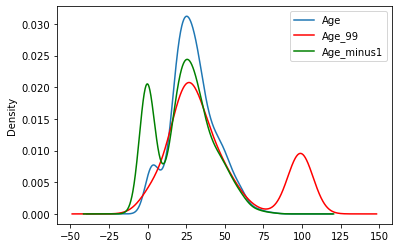

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

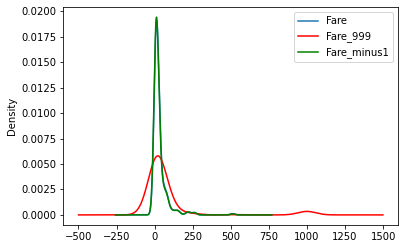

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median,Age_99,Age_minus,Fare_999,Fare_minus1,Age_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085,210.251707,210.251707,130.495777,69.137162,210.251707
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435,-111.965046,135.785804,2761.031435,2761.031435,135.785804
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035,-6.941982,-5.034556,16.878492,17.684447,-5.034556
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518,168.851934,168.851934,104.800406,55.523656,168.851934
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510,152.373211,176.083210,112.560884,58.902166,176.083210
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375,-106.295930,128.910574,2621.232375,2621.232375,128.910574
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482,-103.507347,126.402311,1779.452314,2650.425468,126.402311
Age_99,210.251707,-111.965046,-6.941982,168.851934,152.373211,-106.295930,-103.507347,932.966537,-166.460682,-255.051165,-101.137070,-166.460682
Age_minus,210.251707,135.785804,-5.034556,168.851934,176.083210,128.910574,126.402311,-166.460682,315.995504,262.712284,124.270305,315.995504
Fare_999,130.495777,2761.031435,16.878492,104.800406,112.560884,2621.232375,1779.452314,-255.051165,262.712284,47525.470595,1063.944817,262.712284


In [23]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median,Age_99,Age_minus,Fare_999,Fare_minus1,Age_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232,1.000000,1.000000,0.039967,0.085422,1.000000
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000,-0.069365,0.145071,1.000000,1.000000,0.145071
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536,-0.135079,-0.168329,0.046016,0.203212,-0.168329
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346,0.425422,0.730992,0.036995,0.082612,0.730992
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416,0.383501,0.761497,0.039693,0.087547,0.761497
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003,-0.067972,0.141643,0.234849,0.989855,0.141643
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000,-0.065991,0.138471,0.158952,0.997880,0.138471
Age_99,1.000000,-0.069365,-0.135079,0.425422,0.383501,-0.067972,-0.065991,1.000000,-0.306576,-0.038303,-0.064017,-0.306576
Age_minus,1.000000,0.145071,-0.168329,0.730992,0.761497,0.141643,0.138471,-0.306576,1.000000,0.067792,0.135159,1.000000
Fare_999,0.039967,1.000000,0.046016,0.036995,0.039693,0.234849,0.158952,-0.038303,0.067792,1.000000,0.094357,0.067792


# Using Sklearn

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [28]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [29]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [30]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [31]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [32]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [33]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])